# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [12]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [13]:
data =pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [14]:
male_df =  data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']

In [15]:
female_df.head()

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407


In [16]:
print('Male Height mean: '+str(male_df['Height'].std()))

Male Height mean: 2.863362228660647


In [17]:
print('Male Height mean: '+str(male_df['Height'].mean()))
print('Male Height sd: '+str(male_df['Height'].std()))
print('Male Weight mean: '+str(male_df['Weight'].mean()))
print('Male Weight mean: '+str(male_df['Weight'].std()))


print('Female Height mean: '+str(female_df['Height'].mean()))
print('Female Height mean: '+str(female_df['Height'].std()))
print('Female Weight mean: '+str(female_df['Weight'].mean()))
print('Female Weight mean: '+str(female_df['Weight'].std()))
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height sd: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight mean: 19.7811545167638
Female Height mean: 63.70877360342507
Female Height mean: 2.696284015765054
Female Weight mean: 135.86009300746835
Female Weight mean: 19.022467805319028


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

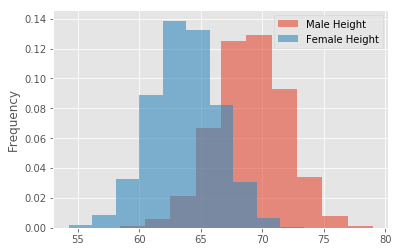

In [18]:

male_df.Height.plot.hist(bins = 10, density = True,  alpha = 0.6, label ="Male Height");
female_df.Height.plot.hist(bins = 10, density = True, alpha = 0.6, label = 'Female Height');
plt.legend()
plt.show()

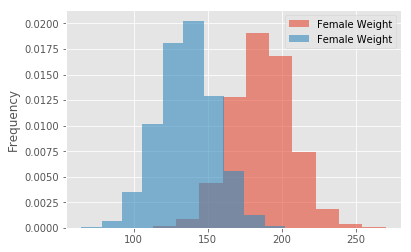

In [19]:
male_df.Weight.plot.hist(bins = 10, density = True,  alpha = 0.6, label ="Female Weight")
female_df.Weight.plot.hist(bins = 10, density = True,  alpha = 0.6, label ="Female Weight")
plt.legend()


#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

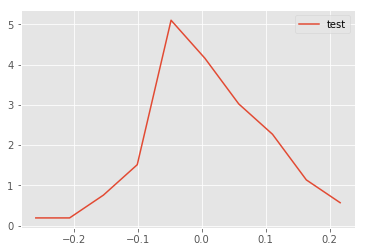

In [20]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    # Initialize numpy arrays with zeros to store interpolated values
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    # plot the calculated curve
    return pdfx, pdfy



# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

In [21]:
male_df.Height.plot.hist(bins = binsize, density = True,  alpha = 0.7, label ="Male Height");
female_df.Height.plot.hist(bins = binsize, density = True, alpha = 0.7, label = 'Female Height');
plt.legend()
x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)
plt.show()

NameError: name 'binsize' is not defined

#### Repeat above exerice for male and female weights

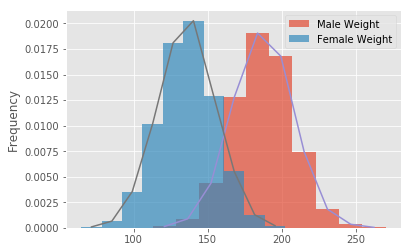

In [23]:
male_df.Weight.plot.hist(bins = 10, density = True,  alpha = 0.7, label ="Male Weight");
female_df.Weight.plot.hist(bins = 10, density = True, alpha = 0.7, label = 'Female Weight');
plt.legend()
x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)
plt.show()

#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?


# So whats the takeaway when comparing male and female heights and weights 



#### Repeat Above experiments in seaborn and compare with your results. 

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


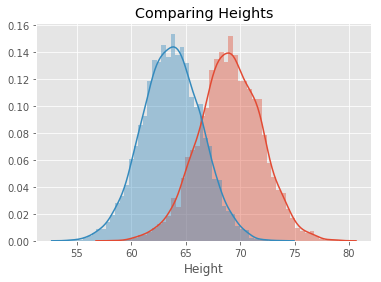

In [25]:
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')
plt.show()

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


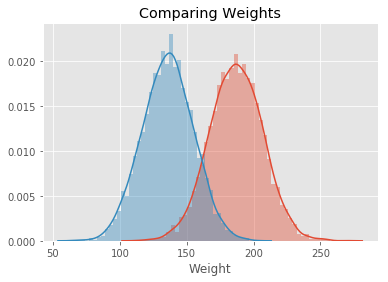

In [26]:
import seaborn as sns
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title('Comparing Weights')
plt.show()

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.